# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas.plotting import table
import random

# Funções

In [2]:
def sorteio(jogadores,rank,modo,rankcustom=None):

    nome = []
    lider_1 = []
    lider_2 = []

    if modo == 1:

        rank_tratado = rank[:(len(jogadores)*2)]

        while len(jogadores) > 0:

            jogador = random.choice(jogadores)
            jogadores.remove(jogador)
            lider1 = random.choice(rank_tratado)
            rank_tratado.remove(lider1)
            lider2 = random.choice(rank_tratado)
            rank_tratado.remove(lider2)

            nome.append(jogador)
            lider_1.append(lider1)
            lider_2.append(lider2)

        df = pd.DataFrame({"Jogador":nome,"Líder 1":lider_1,"Líder 2": lider_2})

    elif modo == 2:

        nome = []
        lider_1 = []
        lider_2 = []

        rank_tratado = rank[:(len(jogadores)*2)]

        for jogador in jogadores:

            nome.append(jogador)

            lider1 = random.choice(rank_tratado)

            lider2 = random.choice(rank_tratado)

            while lider1 == lider2:

                lider2 = random.choice(rank_tratado)

            lider_1.append(lider1)
            lider_2.append(lider2)

        df = pd.DataFrame({"Jogador":nome,"Líder 1":lider_1,"Líder 2": lider_2})

    elif modo in [3,5]:

        rank_tratado = rank[:rankcustom]

        while len(jogadores) > 0:

            jogador = random.choice(jogadores)
            jogadores.remove(jogador)
            lider1 = random.choice(rank_tratado)
            rank_tratado.remove(lider1)

            nome.append(jogador)
            lider_1.append(lider1)


        df = pd.DataFrame({"Jogador":nome,"Líder 1":lider_1})

    elif modo == 4:

        nome = []
        lider_1 = []
        lider_2 = []

        for jogador in jogadores:

            nome.append(jogador)

            lider1 = random.choice(rank)

            lider2 = random.choice(rank)

            while lider1 == lider2:

                lider2 = random.choice(rank)

            lider_1.append(lider1)
            lider_2.append(lider2)

        df = pd.DataFrame({"Jogador":nome,"Líder 1":lider_1,"Líder 2": lider_2})

    return df

# Main

In [3]:
# Obtendo dados

df = pd.read_excel("Data/Líderes Piratas Afundados Cup.xlsx")

# Tratando

df.dropna(inplace=True)

players = df["Unnamed: 0"].loc[df["Unnamed: 0"] != "Nome"].to_list()

df.drop(columns="Unnamed: 0", inplace=True)

df.drop(index=2, inplace=True)

# Transformando em uma unica coluna

df_total = pd.DataFrame()
for item in df.columns.to_list():
    df_total = pd.concat([df_total,df[item]], axis=0)

# Normalizando os elementos da coluna

df_total[0] = df_total[0].str.replace(' ', '').str.upper()

df_total.to_csv("Data/lista_piratas.csv",index=None)

print(f"Temos um total de {len(players)} competidores :")

for player in players:

    print(f"- {player}")

print("Cada competidor votou 10 vezes!")
print(f"Todos os {len(df_total[0])} votos estão preparados!")

Temos um total de 8 competidores :
- Henrique
- Delfino
- Takeshi
- Samuel
- Bardoo
- Carlinhos
- Edu
- V.Bonatto
Cada competidor votou 10 vezes!
Todos os 80 votos estão preparados!


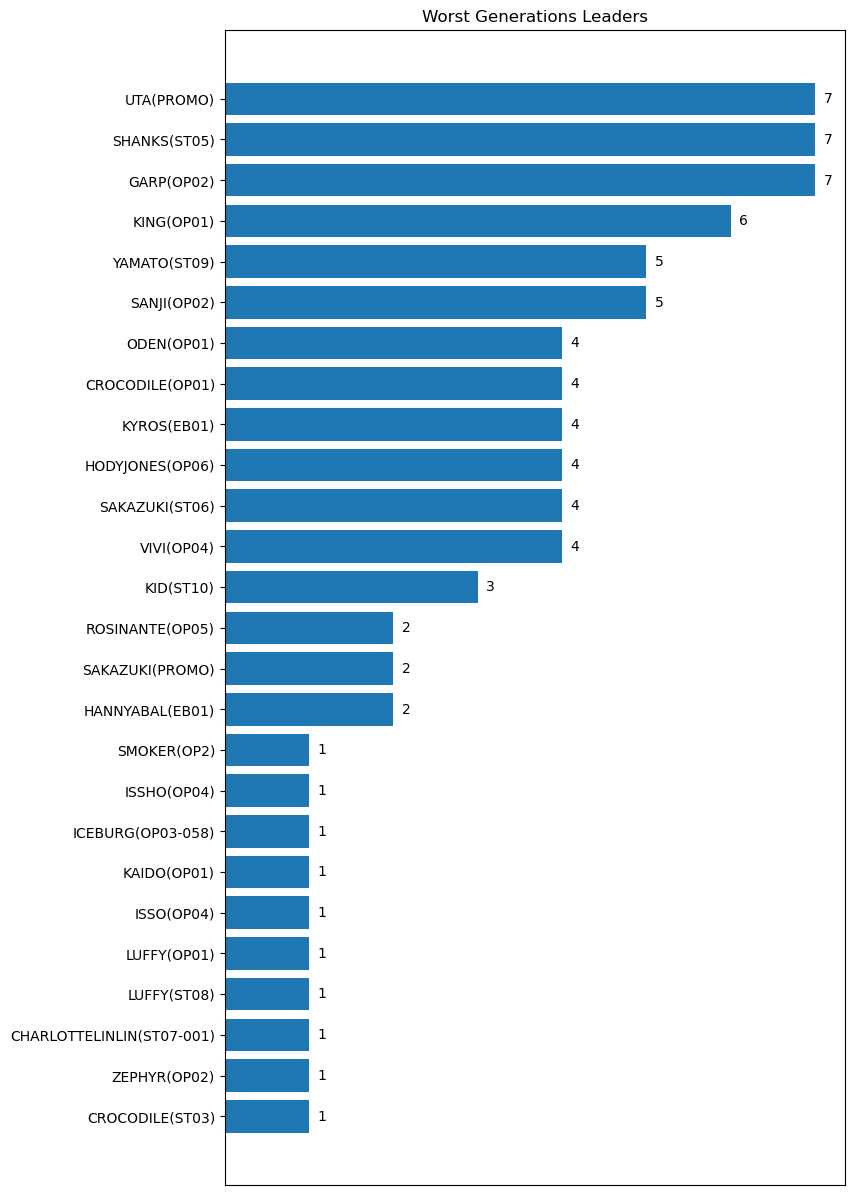

In [4]:
#Tratando total para ser plotado

df_total_str = df_total[0].apply(lambda x: str(x))

# Obtendo rank geral dos líderes votados

df_ranking = df_total_str.value_counts()

# Ajustando o tamanho da figura para acomodar o espaçamento
plt.figure(figsize=(8, 15))

# Criando gráfico de barras horizontal com maior espaçamento entre os rótulos do eixo Y
bars = plt.barh(df_ranking.index, df_ranking.values)

# Adicionando rótulos de dados
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left')

# Inverter o eixo Y para que o maior valor fique no topo
plt.gca().invert_yaxis()

# Ocultar o eixo X
plt.gca().get_xaxis().set_visible(False)

# Adicionando título e rótulos
plt.title('Worst Generations Leaders')

# Salvando o gráfico como um arquivo PNG
plt.savefig('Imagens/Worst_Generation_Rank.png', format='png', bbox_inches='tight')

# Exibindo o gráfico
plt.show()

In [5]:
# Definindo parâmetros para definir o sorteio

topn_liders = len(players)*2 # O Objetivo é sortear 2 lideres para cada participante ( se possível )

print(f"O número de jogadores é {len(players)}")
print("As modalidades possíveis de sorteio são:")

# Definindo modalidades de sorteio possíveis :

if topn_liders < len(df_ranking.index):

    print(f"1 - Sorteio de 2 líderes únicos para cada um dos participantes considerando o top {topn_liders}")
    print(f"2 - Sorteio de 2 líderes para cada um dos participantes, podendo os mesmos se repetirem e considerando o top {topn_liders}")
    print(f"3 - Sorteio de 1 líder único para cada um dos participantes, sendo o top considerado customizavel ( min: {len(players)} - max : {topn_liders})")
    print(f"0 - Realizar novamente votação!")

elif topn_liders > len(df_ranking.index):

    if len(players) <= len(df_ranking.index):

        print(f"4 - Sorteio de 2 líderes para cada um dos participantes, podendo os mesmos se repetirem e considerando o top {len(df_ranking.index)}")
        print(f"5 - Sorteio de 1 líder único para cada um dos participantes, sendo o top considerado customizavel ( min: {len(players)} - max : {len(df_ranking.index)})")
        print(f"0 - Realizar novamente votação!")

    else:

        print(f"4 - Sorteio de 2 líderes para cada um dos participantes, podendo os mesmos se repetirem e considerando o top {len(df_ranking.index)}")
        print(f"0 - Realizar novamente votação!")

O número de jogadores é 8
As modalidades possíveis de sorteio são:
1 - Sorteio de 2 líderes únicos para cada um dos participantes considerando o top 16
2 - Sorteio de 2 líderes para cada um dos participantes, podendo os mesmos se repetirem e considerando o top 16
3 - Sorteio de 1 líder único para cada um dos participantes, sendo o top considerado customizavel ( min: 8 - max : 16)
0 - Realizar novamente votação!


In [6]:
# Obtendo a modalidade escolhida

modalidade = int(input("Digite o número da modalidade escolhida: "))

In [7]:
# Realizando o sorteio

if modalidade == 0:

    print("Ok, até logo!")

elif modalidade in [3,5]:

    aux = 0

    while aux == 0:

        if modalidade == 3:

            customizacao = int(input(f"Qual o rank customizado ?( min:{len(players)} - max : {topn_liders}) : "))

            if customizacao > topn_liders or customizacao < len(players):

                print("Número de rank invalido!")

            else:

                aux = 1

        else:

            customizacao = int(input(f"Qual o rank customizado ?( máx : {len(df_ranking.index)}) : "))

            if customizacao > topn_liders or customizacao < len(players):

                print("Número de rank invalido!")

            else:

                aux = 1

    df_sorteio = sorteio(players,df_ranking.index.to_list(),modalidade,customizacao)

else:

    df_sorteio = sorteio(players,df_ranking.index.to_list(),modalidade)


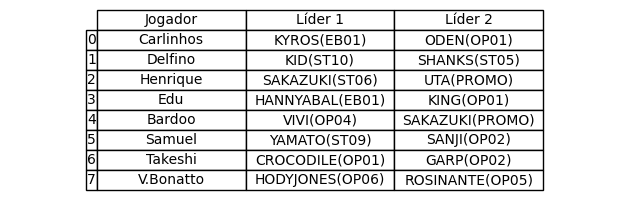

In [8]:
# Criar uma nova figura
fig, ax = plt.subplots(figsize=(8, 2))  # Ajuste o tamanho conforme necessário

# Ocultar o eixo
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Criar e adicionar a tabela ao eixo
tbl = table(ax, df_sorteio, loc='center', cellLoc='center', colWidths=[0.2]*len(df_sorteio.columns))

# Ajustar a aparência da tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)  # Ajuste o tamanho da tabela conforme necessário

# Salvar a figura como uma imagem PNG
plt.savefig('Imagens/lista_sorteio.png', format='png', bbox_inches='tight', dpi=300)

# Mostrar imagem

plt.show()

# Fechar a figura
plt.close()
